There is an ongoing quest in mathematics to find larger and larger prime numbers. Since the primes go on forever, there is no single largest one, but every day around the world computers are churning to find a new record holder.

This project was inspired by [a Numberphile video about how mathematicians find enormous prime numbers](https://www.youtube.com/watch?v=lEvXcTYqtKU). The goal is to find a large prime number ourselves, one that took mathematicians over 2,000 years to find. The record for the largest known prime has since been broken since that video was released; the largest known prime as of May 2021 is

$$ M_{82,589,933} = 2^{82,589,933} - 1 $$

If you were to write the number down it would be longer than the entire text of the Harry Potter series. We won't find any prime numbers nearly that big, but we can try to find one too big to fit in a single tweet.

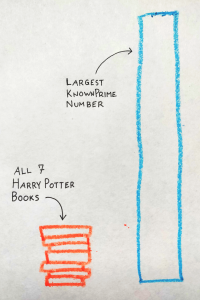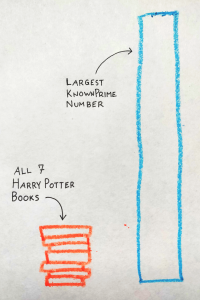

## Two thousand years of math in 10 lines of Python

That gigantic number was found by a worldwide computer search called the Greater Internet Mersenne Prime Search, known as [GIMPS](https://www.mersenne.org/). GIMPS works by picking a number that might be prime and testing it through force. If a number fails the test then it is not prime and the search continues by picking a new candidate. If the number passes, then the number is prime and the team can announce their new discovery.

Mathematicians have been trying to find progressively larger prime numbers for several thousand years - the University of Tennessee at Martin has [a great introduction to the topic](https://primes.utm.edu/largest.html). These techniques were once done by hand, but the last time a human set the record for calculating the largest known prime was done by Leonard Euler in 1876 when he proved the $M_{127}$ is prime. Euler's record stood for 76 years until 1952 when a computer finally found a larger prime number. Since then all records have been set with the help of computers.

With pen and paper Euler showed that $M_{127} = 2^{127} - 1 = 170,141,183,460,469,231,731,687,303,715,884,105,727$ is prime.

In 10 lines of [Python](https://www.python.org/) code we can prove Euler was right and find a bigger prime, surpassing more than 2,000 years of mathematical history.

## How do we know if a large number is prime?

Testing if a very big number is prime generally takes a very, very long time. GIMPS manages to do it by using a version of the [Lucas-Lehmer Primality Test](https://en.wikipedia.org/wiki/Lucas%E2%80%93Lehmer_primality_test) that has been specialized to run very quickly on computers. This article uses the Lucas-Lehmer test, leaving out many of the clever tricks and speedy advantages that GIMPS employs.

Computers are helpful but this method was originally developed and done by hand. The method is so easy to write down it fits in 10 lines of Python code. Proving it works is not as straightforward and mostly uses a lot of modular arithmetic and group theory. Modular arithmetic works the way numbers on a clock do: 12 hours past 6 o'clock is still 6 o'clock, so $6 + 12 \equiv 6$. Group theory is about symmetry: if you turn a square four times it's like you never moved it, so $\mathrm{turning} ^4 = 0$. Both topics use the idea of "going all the way around" and because of that they are heavily intertwined, but you don't need to understand them to run the code.

In [ ]:
def LucasLehmer(p):
    '''Returns True if the number (2^p - 1) is prime, otherwise returns False'''
    s = 4
    M = (2**p) - 1
    for i in range(p - 2):
        s = (s**2 - 2) % M
    if s == 0:
        return True
    else:
        return False

The entire test is 10 lines. This code isn't good enough to set new records, but it'll prove, and beat, Euler!

In [ ]:
p = 127
eulers_prime = (2 ** p) - 1
if LucasLehmer(p):
    print(eulers_prime, 'is prime!')
else:
    print(eulers_prime, 'is not prime.')

The number that took the record from Euler, and from humans once and for all, was $M_{521} = 2^{521} - 1$. We can test that one too.

In [ ]:
p = 521
M_p = (2 ** p) - 1
if LucasLehmer(p):
    print(M_p, 'is prime!')
else: 
    print(M_p, 'is not prime.')

We've beaten Euler! To be fair, we did not really find a number bigger than Euler's - we looked one up and checked it. Next, we show how to discover $M_{521}$ for ourselves and then find even bigger primes. We use the same ideas GIMPS does when deciding which numbers to test next.

## How do we know what numbers to test?

The Lucas-Lehmer test we're using is powerful and easy to write down, but like many good things, these advantages come with a tradeoff. The tradeoff is our test only works in very specific settings. This test can only determine if the number $M_p = 2^p - 1$ is prime. It is not guaranteed that $M_p$ is prime, but $p$ must be prime for $M_p$ to even stand a chance. In short, we need a small prime number, like 2, 3, 127, or 521, to try to make a bigger one.

The proof that $p$ must be prime requires more group theory but you can try a few values to see for yourself.

$p=2$ is prime and $2^2 - 1 = 4 - 1 = 3$ is also prime.

$p=3$ is prime and $2^3 - 1 = 8 - 1 = 7$ is also prime.

$p=4$ is not prime and $2^4 - 1 = 16 - 1 = 15 = 3 \times 5$ is also not prime.

Every time I focus on abstractions for too long I’m always a bit shocked when examples like this work out. For completeness, we’ll see that if $p$ is prime $M_p$ doesn’t have to be prime, so as one last example:

$p=11$ is prime and $2^{11} - 1 = 2048 - 1 = 2047 = 23 \times 89$ is not prime.

Back to the main topic, the point is that before we find a big prime we need a lot of small ones. There are several ways to find small primes, but an easy method that is fast enough for us is the [Sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes). This wonderful animation from Wikipedia shows how it works, but you don't need to understand the details to run the code. 

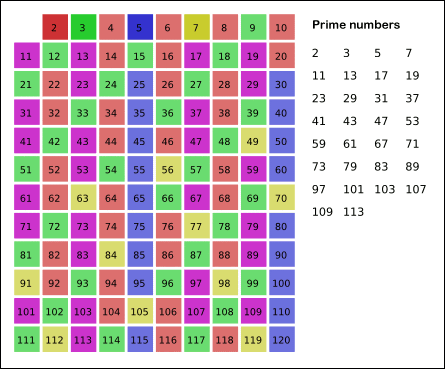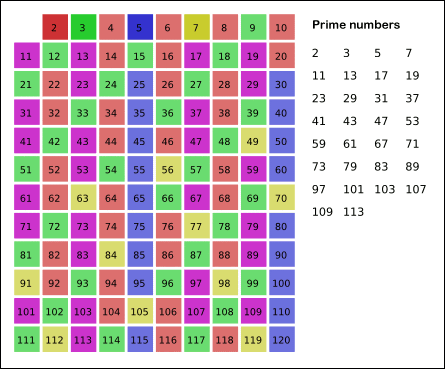

By [SKopp](https://commons.wikimedia.org/wiki/File:Sieve_of_Eratosthenes_animation.gif) at German Wikipedia, used under the CC-BY-SA 3.0 licence.

In [ ]:
def sieveOfEratosthenes(n):
    '''Returns a list of all prime numbers up to n. Fairly quick for n up to 1,000,000.'''
    candidates = {i:True for i in range(2, n)}
    for i in candidates:
        if candidates[i]:
            for j in range(2*i, n, i):
                candidates[j] = False
    primes = [i for i in candidates if candidates[i]]
    
    return primes

With this function we can generate lots of small primes. Let's get all the primes up to 1,000 and beat Euler without cheating.

The block above will generate a list of small prime numbers, each less than 1,000, and test each Mersenne Prime $M_p$ using the Lucas-Lehmer Primality Test. The code prints out each Mersenne Prime as it finds it and then tells us how big the longest one is.

In [ ]:
N = 1000
primes = sieveOfEratosthenes(N)
print(f'Testing the {len(primes)} primes less than {N}. The largest prime less than {N} is {max(primes)}.')

mersenne_primes = []
for p in primes:
    if LucasLehmer(p):
        print(f'2^{p} - 1 = {2**p -1} is prime')
        mersenne_primes.append(p)

print(f'\nFound {len(mersenne_primes)} Mersenne Primes - {mersenne_primes}')
print(f'The largest is 2^{max(mersenne_primes)} - 1 and it has {len(str(2**max(mersenne_primes)-1))} digits.')

The largest prime we found is $M_{607}$, which is even bigger than the 1952 recorder holder $M_{527}$. That means your computer has caught up with more than 2,000 years of mathematicians. Your computer just beat every human who has ever tried to find a large prime number by hand and you know something the famous Euler did not. Try turning up the $N$ from 1,000 to 2,000 and see if your computer can find a prime so big it can't fit in a tweet - that is, find a prime with more than 280 digits.

## Going further

My laptop was able to check all numbers $2^p -1 $ for $p < 10,000$ and found the following $p$ generate Mersenne Primes.

$$ 3, 5, 7, 13, 17, 19, 31, 61, 89, 107, 127, 521, 607, 1279, 2203, 2281, 3217, 4253, 4423, 9689, 9941 $$

That matches [the OEIS list](https://oeis.org/A000043) and [Wikipedia page](https://en.wikipedia.org/wiki/Mersenne_prime) with $p < 10,000$. The biggest of these, $M_{9941} = 2^{9941} - 1$, held the record in 1963 and is mind-bogglingly big.

In [ ]:
M_9941 = (2 ** 9941) - 1
print(f'M_9941 has {len(str(M_9941))} digits!')
print(M_9941, 'is prime.')

To catch up with the current record holder you would need a much more powerful computer and an improved version of our test. Currently, GIMPS takes about a month to test a single number and you can contribute directly to that project by running their code on your computer. You can learn more about the Greater Internet Mersenne Prime Search at https://www.mersenne.org/various/works.php

Thank you for reading!